# Polycrystalline graphene



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from psm.segments import Segments
from psm.build import lattice_segment
from psm import plotutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sample Structure

In [8]:
points = np.load('data/poly_graphene.npy')

segments = Segments(points)
segments.build_graph(1)

NameError: name 'ssss' is not defined

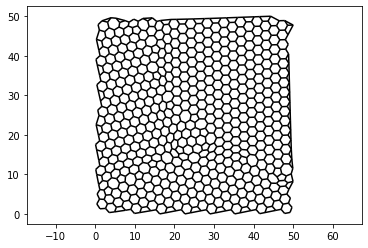

In [3]:
segments.show_graph()

In [4]:
segments.traversals(max_depth=3)

[[0, 160, 1, 34, 157, 551, 2, 36, 305, 316],
 [1, 0, 2, 36, 160, 34, 552, 153, 306, 35],
 [2, 552, 153, 1, 553, 551, 152, 155, 0, 36],
 [3, 60, 61, 7, 802, 59, 62, 351, 5, 6],
 [4, 56, 5, 31, 57, 639, 350, 7, 645, 30],
 [5, 4, 350, 7, 56, 31, 348, 351, 3, 6],
 [6, 30, 150, 7, 29, 31, 149, 151, 3, 5],
 [7, 3, 5, 6, 60, 61, 4, 350, 30, 150],
 [8, 537, 477, 536, 539, 720, 478],
 [9, 96, 104, 94, 97, 99, 102, 103, 93, 494],
 [10, 11, 501, 126, 97, 102, 746, 502, 125, 127],
 [11, 97, 10, 102, 96, 101, 501, 126, 104, 287],
 [12, 82, 115, 14, 218, 517, 116, 119, 13, 15],
 [13, 106, 220, 14, 105, 219, 218, 12, 15],
 [14, 12, 13, 15, 82, 115, 106, 220, 16, 118],
 [15, 16, 118, 14, 105, 19, 123, 119, 12, 13],
 [16, 105, 19, 15, 106, 17, 20, 118, 14],
 [17, 18, 19, 21, 137, 20, 16, 133],
 [18, 17, 137, 20, 19, 21, 136, 138, 123],
 [19, 16, 17, 20, 105, 15, 18, 21, 123],
 [20, 19, 18, 123, 16, 17, 137, 122, 118],
 [21, 17, 133, 18, 19, 138, 132],
 [22, 26, 27, 124, 25, 23, 129, 135, 128, 125],
 [2

## Template structure

In [5]:
from psm.match import order_segments

AttributeError: 'Segments' object has no attribute '_indices'

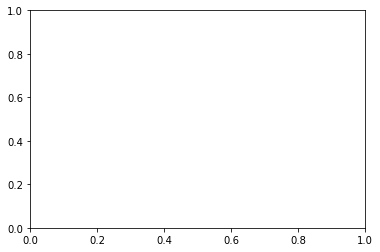

In [7]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]
basis = [[0,0],[1/np.sqrt(3), 0]]

templates = lattice_segment(a, b, basis=basis, min_alpha=.8, max_depth=3)

templates = order_segments(templates)

templates.show_segments();

## Pairing

In [7]:
rmsd = segments.register(templates, transform='similarity', pivot='front')

 [||||||||||||||||||||] 1029/1029 registrations


In [32]:
best_rmsd

array([nan, nan, nan, ..., nan, nan, nan])

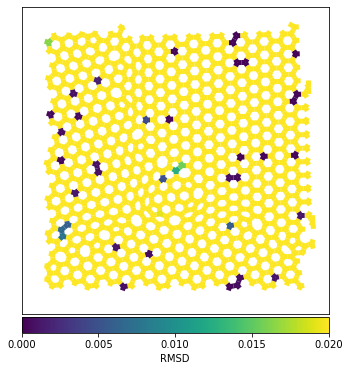

In [8]:
_, best_rmsd = segments.best_matches()

fig, ax = plt.subplots(1, 1, figsize=(6,6))

plotutils.edge_plot(segments, ax=ax, c=best_rmsd, color_mode='ends', vmin=0, vmax=.08, linewidth=5)
plotutils.add_colorbar(ax, label='RMSD', cmap='viridis', vmin=0, vmax=.02)

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([]);

## Strain

In [37]:
strain, rotation = segments.calc_strain(adjust_zero='median', rmsd_max=.1)

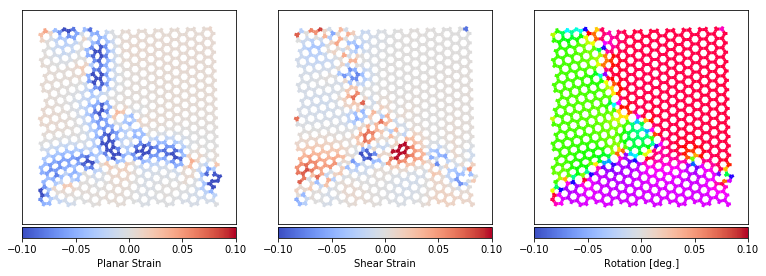

In [38]:
rotation[np.isnan(rotation)==False] = rotation[np.isnan(rotation)==False] % (np.pi/3)
planar = np.trace(strain, axis1=1, axis2=2) / 2

fig,axes = plt.subplots(1,3,figsize=(13,6))

plotutils.edge_plot(segments, ax=axes[0], c=planar, color_mode='ends', cmap='coolwarm', vmin=-.1, vmax=.1, linewidth=3)
plotutils.add_colorbar(axes[0], label='Planar Strain', cmap='coolwarm', vmin=-.1, vmax=.1)

plotutils.edge_plot(segments, ax=axes[1], c=strain[:,0,1], color_mode='ends', cmap='coolwarm', vmin=-.1, vmax=.1, linewidth=3)
plotutils.add_colorbar(axes[1], label='Shear Strain', cmap='coolwarm', vmin=-.1, vmax=.1)

plotutils.edge_plot(segments, ax=axes[2], c=rotation / np.pi * 180, color_mode='ends', cmap='hsv', 
                    vmin=0, vmax=60, linewidth=3)
plotutils.add_colorbar(axes[2], label='Rotation [deg.]', cmap='coolwarm', vmin=-.1, vmax=.1)

for ax in axes:
    ax.axis('equal'); ax.set_xticks([]); ax.set_yticks([])